In [2]:
exec(open("inc_notebook_jawad.py").read())

current working dirC:\TFModels\DoodleForPicStory


In [3]:
import logging, sys, math,os
exec(open("classifiers/initKeras.py").read())

Using TensorFlow backend.


In [4]:
from datetime import datetime
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib qt
import seaborn as sns
sns.set(style="darkgrid")

if sys.modules.get( 'library.LivePlotKeras', False ) != False :
    del sys.modules['library.LivePlotKeras'] 
if sys.modules.get( 'LivePlotKeras', False ) != False :
    del sys.modules['LivePlotKeras'] 
from library.LivePlotKeras import *

logging.warning( "LivePlotKeras loaded" )

livePlotKeras = LivePlotKeras()

In [5]:
if sys.modules.get( 'dataProcessors.DoodleDataStats', False ) != False :
    del sys.modules['dataProcessors.DoodleDataStats'] 
if sys.modules.get( 'DoodleDataStats', False ) != False :
    del sys.modules['DoodleDataStats'] 
    
from dataProcessors.DoodleDataStats import DoodleDataStats
dataStats = DoodleDataStats("folder")
dataStats.loadFromPersistentCacheByDate(datetime(2019, 11, 21))

{'folder': 'data/quickdraw-raw',
 'countClasses': 7,
 'countItems': 1129934,
 'classes': {'aircraft_carrier': 116504,
  'airplane': 151623,
  'angel': 149736,
  'ant': 124612,
  'apple': 144722,
  'banana': 307936,
  'The_Eiffel_Tower': 134801},
 'maxPerClass': 307936}

In [6]:
if sys.modules.get( 'dataProcessors.DoodleDataGeneratorByClass', False ) != False :
    del sys.modules['dataProcessors.DoodleDataGeneratorByClass'] 
if sys.modules.get( 'DoodleDataGeneratorByClass', False ) != False :
    del sys.modules['DoodleDataGeneratorByClass'] 
    
from dataProcessors.DoodleDataGeneratorByClass import DoodleDataGeneratorByClass

trainGenerator = DoodleDataGeneratorByClass(dataStats.stats,split=0.7, part='first', batch_size = 32, batchesPerEpoch = 100)
validationGenerator = DoodleDataGeneratorByClass(dataStats.stats,split=0.7, part='second', batch_size = 32, batchesPerEpoch = 30)

In [9]:


model = Sequential()
model.add(Convolution2D(64, 5, 5, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64, 5, 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(.20))
model.add(Dense(dataStats.stats['countClasses'], activation='softmax'))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy', metrics.MSE])

C:\Users\abjawad\AppData\Local\Continuum\anaconda3\envs\tf1xpy36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
  
C:\Users\abjawad\AppData\Local\Continuum\anaconda3\envs\tf1xpy36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu")`
  after removing the cwd from sys.path.


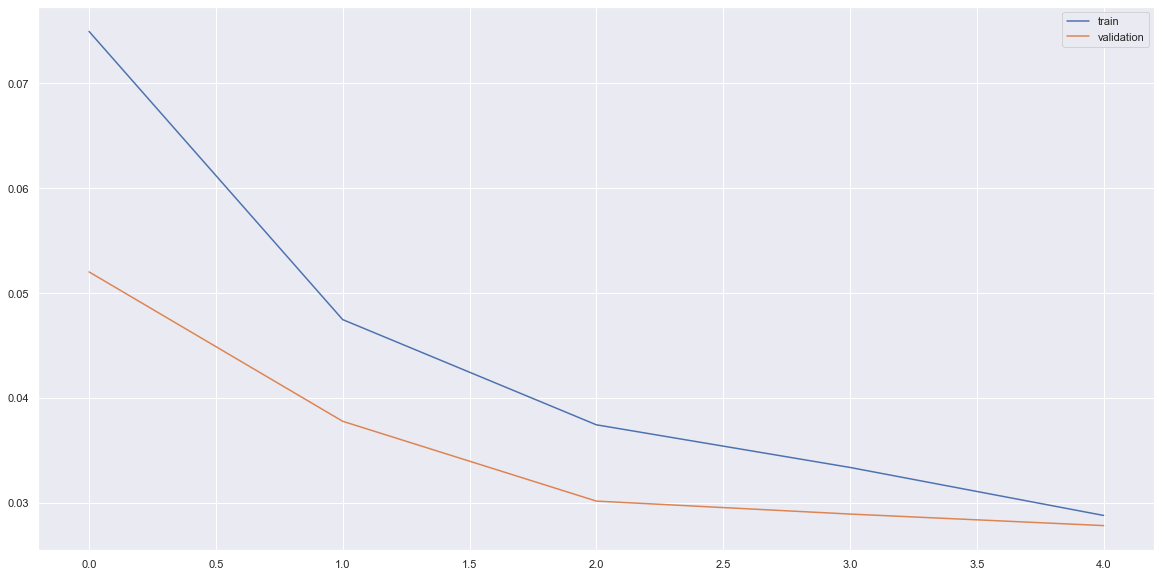

In [10]:
history = model.fit_generator( 
                    generator=trainGenerator,
                    validation_data=validationGenerator,
                    use_multiprocessing=False, 
                    workers=3, 
                    initial_epoch = 0,
                    epochs=5,
                    max_q_size = 100,
                    steps_per_epoch = trainGenerator.n_batches,
                    validation_steps = validationGenerator.n_batches,
                    callbacks = [livePlotKeras]
                   )

In [11]:
history.history

{'val_loss': [0.05201572409520547,
  0.03775740743925174,
  0.03014228803416093,
  0.02890304715062181,
  0.02780241866906484],
 'val_acc': [0.740625,
  0.8177083333333334,
  0.859375,
  0.8583333333333333,
  0.8697916666666666],
 'val_mean_squared_error': [0.05201572409520547,
  0.03775740743925174,
  0.03014228803416093,
  0.02890304715062181,
  0.02780241866906484],
 'loss': [0.07497004810720682,
  0.04746284268796444,
  0.037422755118459466,
  0.033353179390542206,
  0.028771055107936264],
 'acc': [0.5890625, 0.7703125, 0.826875, 0.84, 0.8634375],
 'mean_squared_error': [0.07497004810720682,
  0.04746284268796444,
  0.037422755118459466,
  0.033353179390542206,
  0.028771055107936264]}